# Project 2: Reproducibility in Natural Language Processing



## Part 1: Data Loading and Initial Exploration (15 pts)

The data for this project is stored in the `data` folder in your repositories, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

In this section you will:

1. Import the data into a pandas dataframe
2. Perform exploratory data analysis (EDA) including specifically:
- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president
3. Write commentary on your findings

First, create the `conda` environment with the provided yaml file. Note, it's not unusual for it to take ~15 minutes for the environment to fully install.

### Read Data

In [26]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-dark')

Path("outputs").mkdir(exist_ok=True) #Hopefully will make sure a folder for outputs exist

In [27]:
#Loading in data
sou = pd.read_csv("data/SOTU.csv")
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


In [28]:
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### Exploratory Data Analysis

Replicate the plots below using the hints specified. For each plot, provide some commentary describing the results/anything interesting you might see.

#### Number of Speeches per President

In [29]:
#order by first appearance
pres_order = sou["President"].drop_duplicates()

#spp = Speeches per president
spp = (sou["President"].value_counts()
       .reindex(pres_order))             #computes the counts for each president


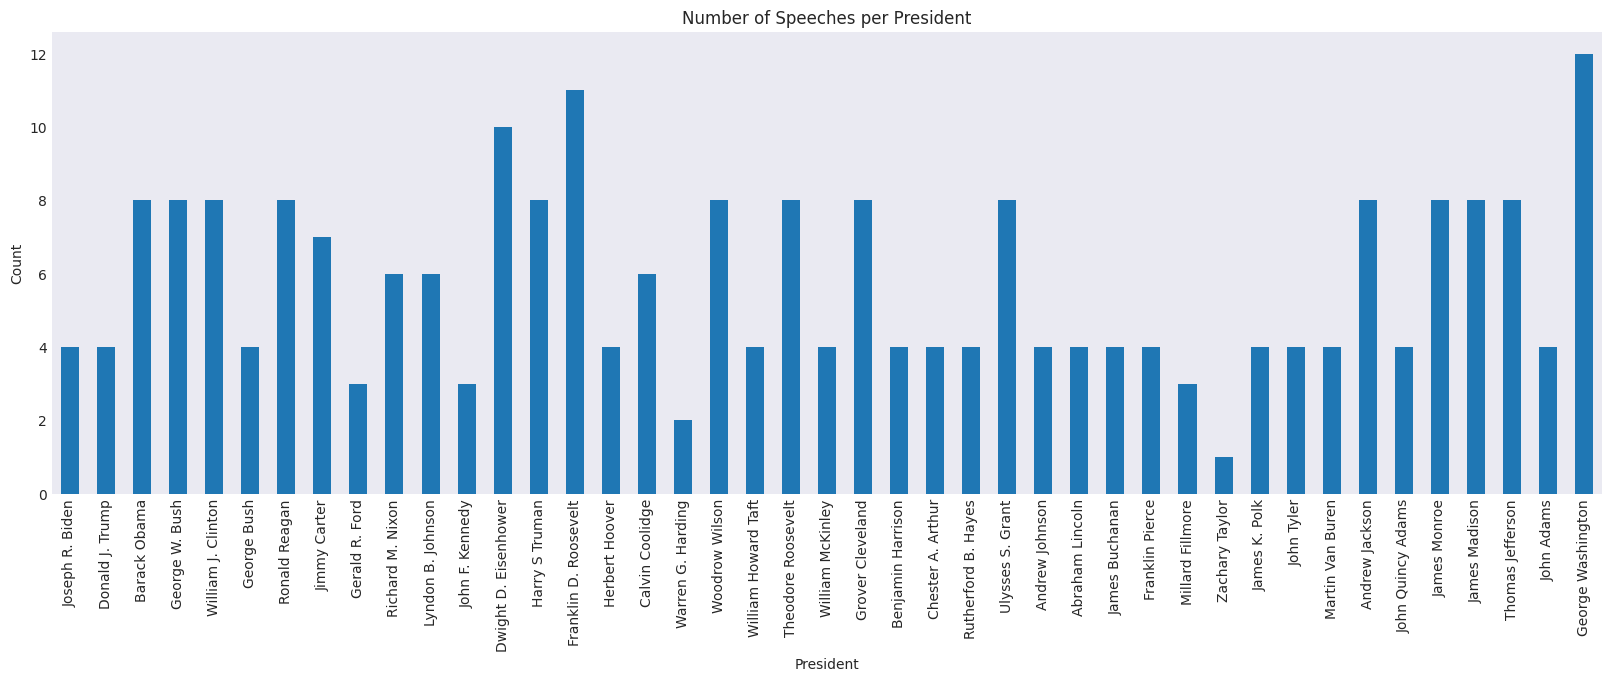

In [30]:
# Plot 
spp.plot(kind = "bar", figsize = (20,6))
plt.title("Number of Speeches per President")
plt.xlabel("President")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show
plt.savefig("outputs/Number_of_speeches_per_president.png", dpi=300, bbox_inches='tight')

Commentary: George Washinton gave the most speeches followed by Franklin D. Roosevelt and Dwight D. Eisenhower. They were all president during some of the country's most ciritical times like the American Revolutionary War for George Washington, the Great Depression and WWII for Roosevelt and the Cold War for Eisenhower. These tough times feels like the public would need motivating and encouraging speeches from their leaders to continue fighting. 

#### Number of Speeches per Year

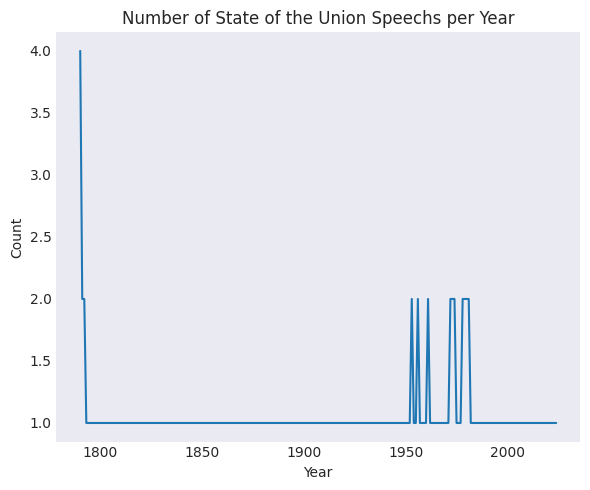

<Figure size 640x480 with 0 Axes>

In [31]:
#spy = speeches per year
spy = (sou["Year"].value_counts().sort_index())  #gives counts and sorts by oldest year to newest

#Plot
plt.figure(figsize = (6,5)) 
plt.plot(spy.index, spy.values)
plt.title("Number of State of the Union Speechs per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.savefig("outputs/Number_of_speeches_per_year.png", dpi=300, bbox_inches='tight')


Commentary: The number of speeches per year drops from 4 to 1 from 1800 to 1950, this was a time in the U.S. where the country was focused on expanding its territory. The country and its leaders were too busy with fighting territory wars to give more than one speech a year. The speech they were able to give most likely was an inaugural speech in which a president sworn into office gives an inaugural address to commence his presidency. 

From 1950 to 2000, events like the Korean War, the Civil Rights Movement, the Vietnam War, etc. occured which led to needing 1-2 speeches a year to help the public either mainatin a fighting spirit or to inform the public of initiating war against another country. 

#### Word Count Distribution 

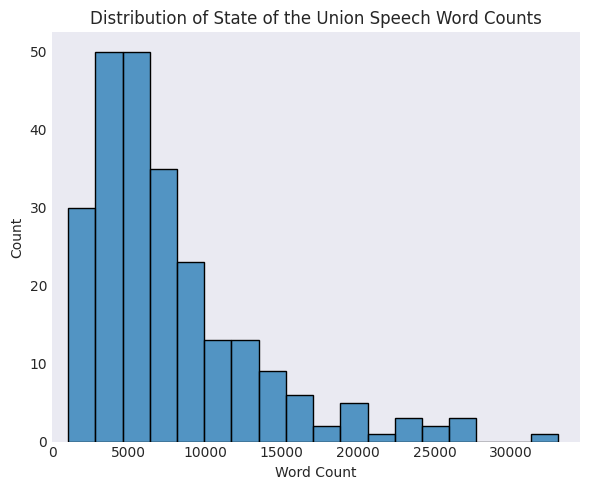

<Figure size 640x480 with 0 Axes>

In [32]:
#using the Word Count column already made, making a plot and figuring out the bin size

#Plot
plt.figure(figsize = (6, 5))
#Using Seaborn
sns.histplot(sou["Word Count"], bins = 18, kde = False,
             color = "#1f77b4", edgecolor = "black")
plt.title("Distribution of State of the Union Speech Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.xlim(0, 34500)
plt.tight_layout()
plt.show()
plt.savefig("outputs/Word_count_distribution.png", dpi=300, bbox_inches='tight')


Commentary: The graph is right-skewed so majority fo the speeches were on the shorter lengths of 5000 words instead of very long. The speeches that were given were probably to address one thing so that it would be faster to deliver it to the public. They were also probably very expensive to print since in the past, letters were printed letter by letter so the fewer, words the better.

The longest speech was given by President Jimmy Carter and was 33,667 words long.

#### Word Count Distribution over Year

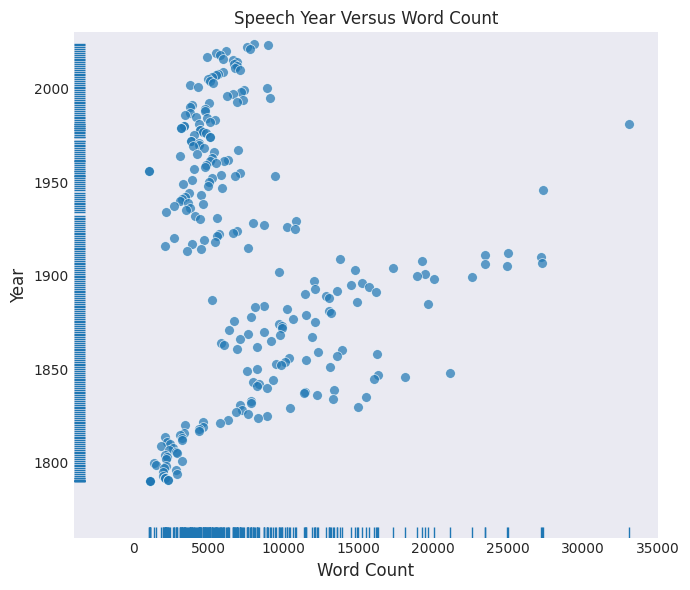

<Figure size 640x480 with 0 Axes>

In [33]:
#Plot
plt.figure(figsize=(7, 6))

#Making scatterplot for dots
sns.scatterplot(data = sou, x = "Word Count", y = "Year", s=50, alpha = 0.7)

#making rugplot for lines along the x-axis
sns.rugplot(data=sou, x = "Word Count", height=0.02, color = "#1f77b4")
plt.title("Speech Year Versus Word Count", fontsize=12)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Year", fontsize=12)
#making rugplot for lines along the y-axis
sns.rugplot(data=sou, y = "Year", height = 0.02, color = "#1f77b4")
plt.xlim(-4000, 35000)
plt.ylim(1760, 2030)
plt.tight_layout()
plt.show()
plt.savefig("outputs/Speech_year_vs_word_count.png", dpi=300, bbox_inches='tight')


Commentary: This graph shows us when the amount of words were said in a speech. For example, Jimmy Carter's really long speech took place somewhere around the 1970-1980s. His presidential term lasted from January of 1977 to January of 1981 so this makes sense. In general, majority of presidents tend to publish "short" speeches during their presidency and those who published longer speeches were in troubled times of trying to keep the country afloat whether is was trying to better the economic status or war status.

#### Word Count Distribution per President

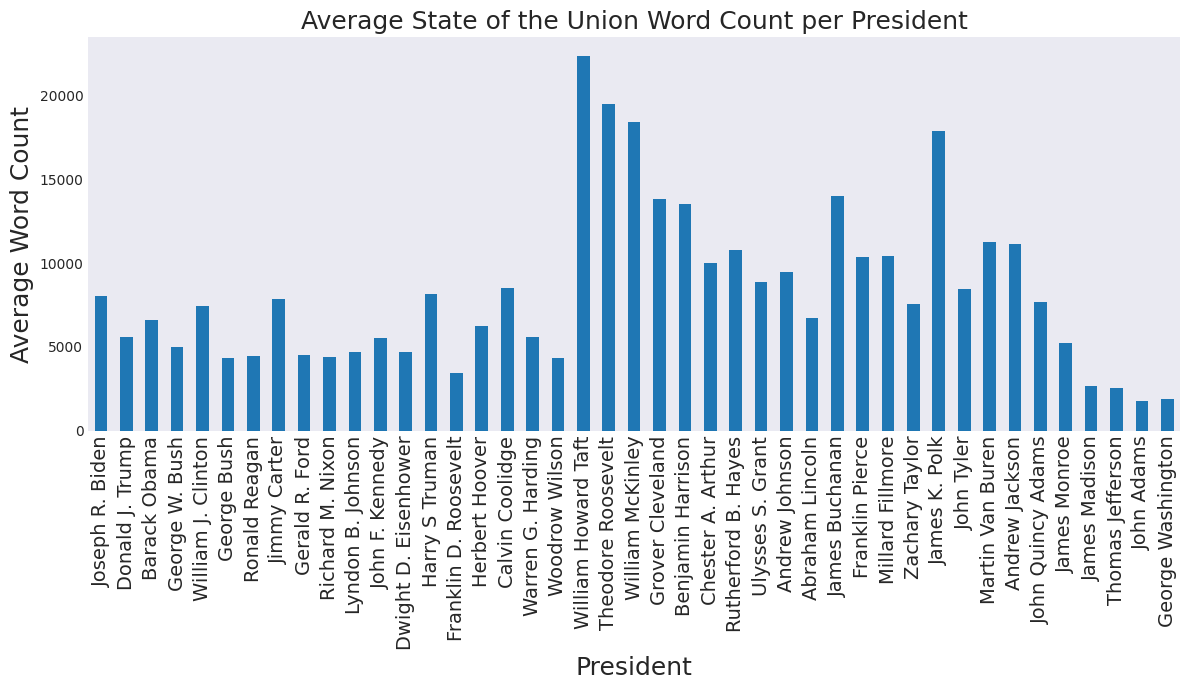

<Figure size 640x480 with 0 Axes>

In [34]:
#group by president and compute mean
#wcpp = word count per president
mean_wcpp = sou.groupby("President")["Word Count"].mean()

#order by appearance in data
mean_wcpp = mean_wcpp.loc[pres_order]

#Plot
plt.figure(figsize=(12, 7))

mean_wcpp.plot(kind = "bar", color = "#1f77b4")
plt.title("Average State of the Union Word Count per President", fontsize=18)
plt.xlabel("President", fontsize=18)
plt.ylabel("Average Word Count", fontsize=18)
plt.xticks(rotation = 90, fontsize = 14)
plt.tight_layout()
plt.show()
plt.savefig("outputs/Avg_word_count_per_president.png", dpi=300, bbox_inches='tight')


Commentary: The highest average word count belongs to William Howard Taft, which makes sense since he was known to be a very ponderous person since he had a legal background. From his days of being a Chief Justice, he would tend to write in great detail which leads to more words and a higher average word count. 

The same can be said about the following presidents with the following highest averages; these presidents were most likely people who tended to write in great detail due to their education status, their nature, or just following the common style of speeches for 19th century presidents. 